In [2]:
# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Import and read the data file (car4u.csv).
store = pd.read_csv('loyalty_club.csv')

# View the DataFrame.
store.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
store.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


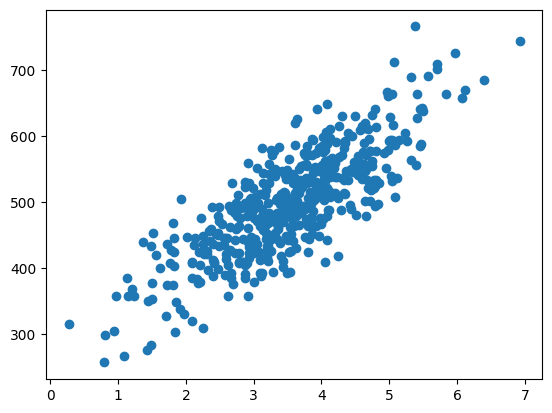

In [5]:
# Define the dependent variable.
x = store['Length of Membership'] 

# Define the independent variable.
y = store['Yearly Amount Spent'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [6]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = store).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     943.9
Date:                Wed, 31 May 2023   Prob (F-statistic):          4.81e-117
Time:                        12:29:53   Log-Likelihood:                -2629.9
No. Observations:                 500   AIC:                             5264.
Df Residuals:                     498   BIC:                             5272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    272.3998      7.675     35.492      0.000     257.320     287.479
x             64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$: 65% of the total variability of `y` (money spent by customers), is explained by the variability of `X` (how long they have been a member).  
> - F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the `t`-statistic is equivalent.
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 unit. In this activity, if the length that the customer has been a member (`X`) changes by 1 unit (please check units used) the money spent (`y`) will change by 64.2187 units. 
>  - The `t`-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (60.112 , 68.326).
>   - In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

In [7]:
# Create the linear regression model.
y_pred = (272.3998) + 64.2187 * store['Length of Membership']

# View the output.
y_pred

0      534.580390
1      443.480612
2      535.988229
3      472.773625
4      557.935940
          ...    
495    512.999846
496    502.079645
497    590.813099
498    422.445808
499    448.048192
Name: Length of Membership, Length: 500, dtype: float64

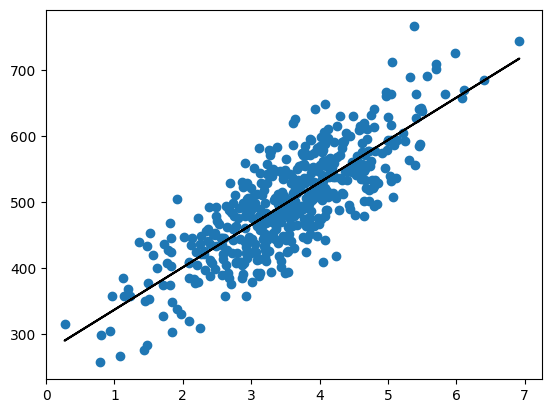

In [9]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)

# View the plot.
plt.show()

In [10]:
store.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


# Summarise findings & add to git
There is a strong positive correlation between length of memebership and yearly amount spent. 